<a href="https://colab.research.google.com/github/sourav263/LGMVIP/blob/main/Copy_of_Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

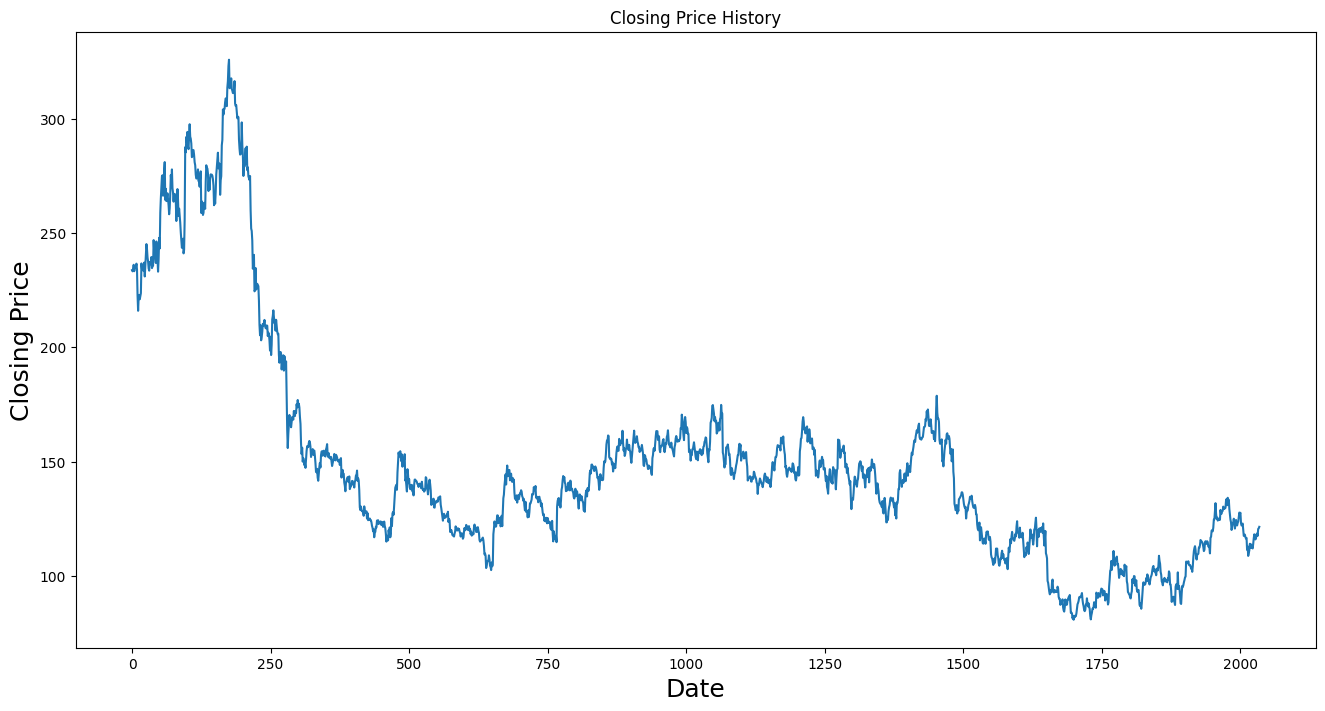

Epoch 1/50
49/49 [==============================] - 11s 84ms/step - loss: 0.0105
Epoch 2/50
49/49 [==============================] - 4s 83ms/step - loss: 0.0030
Epoch 3/50
49/49 [==============================] - 5s 109ms/step - loss: 0.0028
Epoch 4/50
49/49 [==============================] - 4s 85ms/step - loss: 0.0027
Epoch 5/50
49/49 [==============================] - 4s 84ms/step - loss: 0.0025
Epoch 6/50
49/49 [==============================] - 5s 110ms/step - loss: 0.0021
Epoch 7/50
49/49 [==============================] - 4s 84ms/step - loss: 0.0027
Epoch 8/50
49/49 [==============================] - 4s 90ms/step - loss: 0.0020
Epoch 9/50
49/49 [==============================] - 5s 103ms/step - loss: 0.0022
Epoch 10/50
49/49 [==============================] - 4s 84ms/step - loss: 0.0019
Epoch 11/50
49/49 [==============================] - 5s 98ms/step - loss: 0.0018
Epoch 12/50
49/49 [==============================] - 5s 95ms/step - loss: 0.0019
Epoch 13/50
49/49 [==============

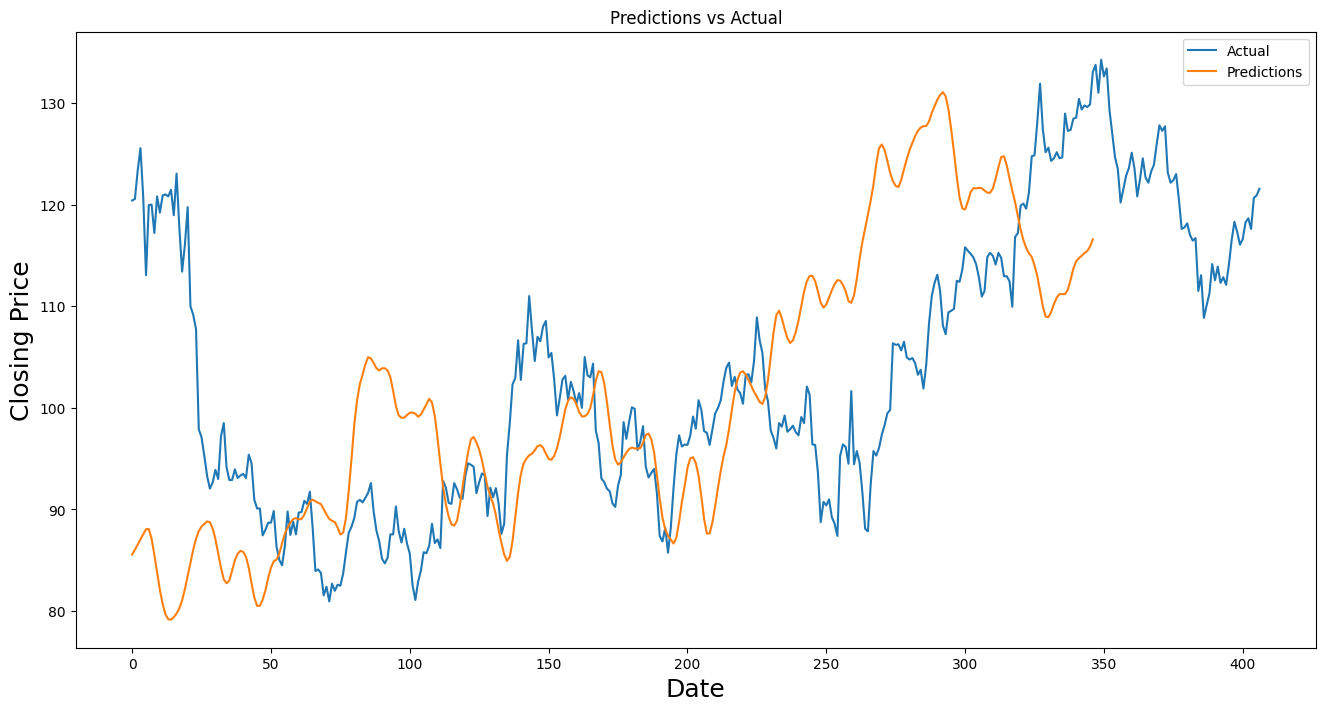

In [ ]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

# Visualize the dataset
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Split the data into training and testing datasets
train_data = scaled_data[0:int(len(dataset)*0.8), :]
test_data = scaled_data[int(len(dataset)*0.8):, :]

# Define the number of timesteps and features
timesteps = 60
features = 1

# Create the training dataset
x_train = []
y_train = []
for i in range(timesteps, len(train_data)):
    x_train.append(train_data[i-timesteps:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], features))

# Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], features)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Create the testing dataset
x_test = []
y_test = dataset[int(len(dataset)*0.8):, :]
for i in range(timesteps, len(test_data)):
    x_test.append(test_data[i-timesteps:i, 0])
x_test = np.array(x_test)

# Reshape the data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], features))

# Make predictions on the testing dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Visualize the predictions
plt.figure(figsize=(16,8))
plt.title('Predictions vs Actual')
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.legend()
plt.show()

